&nbsp;

# 2. Base Models
Whenever conducting empirical testing, it is always a good idea to have a point of reference to compare against, this can come in the form of a benchmark. A benchmark is something that serves as a standard by which others may be measured or judged. In the world of machine learning, benchmarks don’t have to consist of world class models, on the contrary a good starting point is always the default algorithms. The point of having a benchmark is to test out our hypotheses to analyze whether our assumptions measure up and perform the way we hypothesize.

In [1]:
# Importing standard libraries. 
import pandas as pd
import numpy as np 
import os
import plotly.express as px
import plotly.graph_objects as go

# Import functions. 
import visuals

# ML models. 
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Ensemble Models.
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

# Cross Validation Library.  
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Converts plotly output into static images, so it can be viewed inside github repository. 
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
root = os.getcwd() # Setting root directory as cwd. 
df = pd.read_csv(r"{}\train.csv".format(root)) # Importing the train set.
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.78570,20.0,3.97,0,0.647,7.014,84.6,2.1329,5,264.0,13.0,384.07,14.79,30.7
1,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4


&nbsp;

### Section A: Base Model Testing
In this section we will be exploring a variety of Machine Learning algorithms and how well they perform with our data. We'll pick out the top 3 best performing models and use them as our benchmarks, when conducting hypotheses. Since this is a regression task, the loss function we will be focusing on is the Mean Squared Error (MSE).  

**A.1: Testing our Base Models**<br>
The next step is to train each base model on our train data and use cross validation to output a loss function. The models with the lowest loss function will be chosen.

In [3]:
# Splitting our features and labels. 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

models, results = list(), list() # Storing results. 
modelNames = ['LR', 'EN', 'CART', 'SVR', 'KNN', 'GBR', 'RFR', 'XGB']
modelInstance = [LinearRegression(), ElasticNet(), DecisionTreeRegressor(), SVR(), KNeighborsRegressor(), 
                 RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor()]

modelScores = {}

# Storing the model name and instance inside as tuples inside a list. 
for name, model in zip(modelNames, modelInstance):
    model.fit(X, y) # Training the model on the train data. 
    cv = KFold(n_splits=5, shuffle=True, random_state=42) # Using 5 fold cross validation strategy.
    cv_results = cross_validate(model, X, y, cv=cv, scoring='neg_mean_squared_error', return_train_score=True) 
    results.append(abs(cv_results['test_score'])) # Append validation results. 
    print("%s scored an MSE train score of: %.2f and a test score of: %.2f" % (name, 
                                                                                  abs(cv_results['train_score'].mean()), 
                                                                                  abs(cv_results['test_score'].mean())))
    
    # Storing results to use as benchmark values.
    modelScores[name] = round(abs(cv_results['test_score'].mean()),4)

LR scored an MSE train score of: 22.05 and a test score of: 25.96
EN scored an MSE train score of: 26.68 and a test score of: 29.02
CART scored an MSE train score of: 0.00 and a test score of: 20.76
SVR scored an MSE train score of: 67.63 and a test score of: 68.25
KNN scored an MSE train score of: 26.73 and a test score of: 43.67
GBR scored an MSE train score of: 1.79 and a test score of: 10.77
RFR scored an MSE train score of: 1.34 and a test score of: 9.30
XGB scored an MSE train score of: 0.00 and a test score of: 10.69


**A.2: Table of Results**<br>
Based on the results, the three models I will choose are: Gradient Boosting Regressor, Random Forest Regressor and the XGB Regressor. Even though these models overfitted, they are tree ensemble methods, which means we can implement various techniques to remove overfitting.

| Model | Train MSE | Validation MSE | Overfit | Accept Model |
|---------|---------|---------|---------|---------|
| **Linear Regression** | 22.05 | 25.96 |❌ |❌ |
| **ElasticNet** | 26.68 | 29.02 |❌ |❌ |
| **Decision Tree** | 0.00 | 20.30 |✔️ |❌ |
| **Support Vector Regressor** | 67.63 | 68.25 |❌ |❌ |
| **K Neighbors Regressor** | 26.73 | 43.67 |✔️ |❌ |
| **Gradient Boosting Regressor** | 1.76 | 11.37 |✔️ |✔️ |
| **Random Forest Regressor** | 1.34 | 9.30 |✔️ |✔️ |
| **XGB Regressor** | 0.00 | 10.69 |✔️ |✔️ |

**A.3: Plotting the 5 Folds Score**<br>
Let's see the distribution of each model's folds.

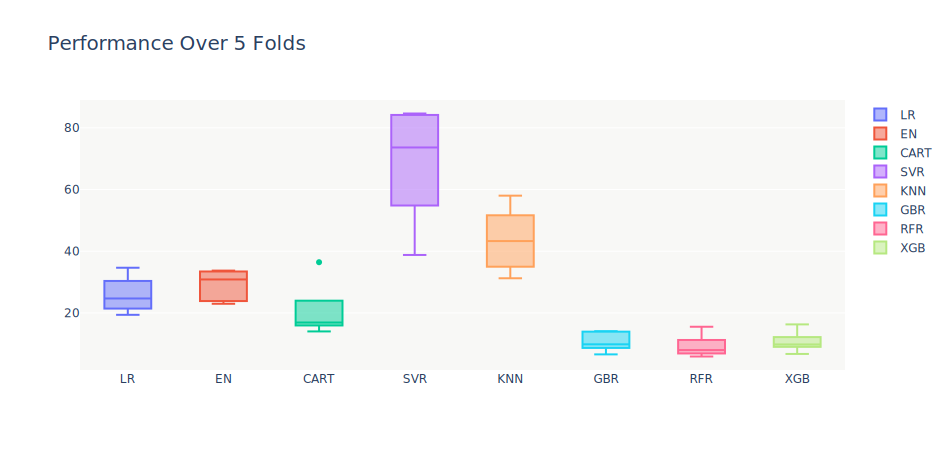

In [4]:
visuals.kfold(scores=results)

* SVR performed the worst with the highest variance. 
* Our ensemble models [GBR, RFR & XGB] scored the best MSE results over 5 folds, with skewed distributions. 

&nbsp;

&nbsp;
**Author:** Aaron Chew&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **|** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Date Published:** 11/08/2022 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**|** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Email:** aaronsamuelchew@gmail.com &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**|**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **GitHub:** https://github.com/aaron-chew  